# AdaBoost

> [With AdaBoost], base classfiers are trained in sequence, and each base classifier is trained using a weighted form of the data set in which the weighting coefficient associated with each data point depends on the performance of the previous classifiers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

In [14]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

Let $\mathcal D = \big\{({\bf x}_n, t_n) \vert {\bf x}_n \in \mathbb{R}^D, t_n \in \{-1, 1\}\big\}_{n=1}^N$ a training dataset. AdaBoost defines an estimation function $G$ defined as

$$
    G({\bf x}) = \text{sign}\left(\sum_{m=1}^M \alpha_m \cdot G_m({\bf x})\right)
$$

* $\alpha_m$ is the weighting coefficient over $G_m$
* $G_m$ is known as the weak learner

#### AdaBoost M.1 Algorithm

1. Initialize $\forall n: w_n = 1/N$
2. For $m=1,\ldots, M$:
    * Train $G_m$ using the weighting coefficients $\{w_n^{(m)}\}_{n=1}^N$
    * Compute $$
     \text{err}_m = \frac{\sum_{n=1}^N w_n^{(m)}\mathbb{1}\big(t_n \neq G_m({\bf x}_n)\big)}{\sum_{n=1}^N w^{(m)}_n}
              $$
    * Compute $$
        \alpha_m = \log\left(\frac{1 - \text{err}_m}{\text{err}_m}\right)
              $$
    * Define $$
        \forall n: w_n^{(m + 1)} = w_{n}^{(m)} \exp\left(\alpha_m \cdot \mathbb{1}\right)
             $$
3. Define $G({\bf x}) = \text{sign}\left(\sum_{m=1}^M \alpha_m G_m({\bf x})\right)$


----

We can train $G_m$ using the following cost function:
$$
    J_m = \sum_{n=1}^N w_n^{(m)}\mathbb{1}\big(t_n \neq G_m({\bf x}_n)\big)
$$

## A practical example

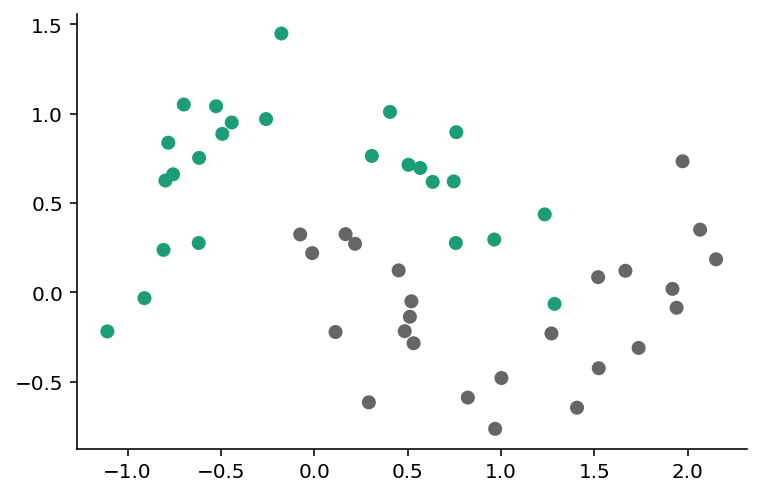

In [18]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=3141)
plt.scatter(*X.T, c=y, cmap="Dark2")

In [23]:
2 * y - 1

array([-1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1])